In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dps import sample, darkphoton
from dps.fit import dcs, ics

### Initi a dark photon

In [2]:
M = 2.0
dp = darkphoton.DarkPhoton(M)

# get the maximal kT for any z
z = np.linspace(-0.2, 1.2, 100)
kTmax = dp.kTmax(z)

<IPython.core.display.Javascript object>


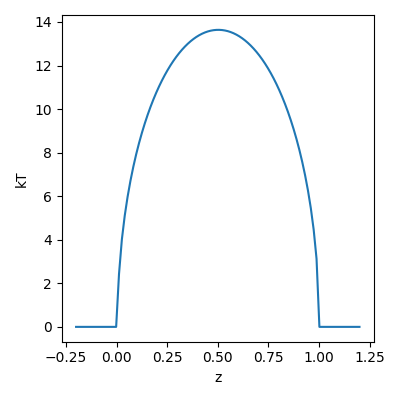

In [3]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(z, kTmax)
ax.set_xlabel("z")
ax.set_ylabel("kT")
plt.tight_layout()

### Generate random momenta within the physical region for a given mass 

In [4]:
sample_size = 10000

# set random momenta to the darkphoton
sample.sample(dp, "random", sample_size, seed=0, set_coord=True, quiet=True)
# access momenta
print(dp.z[:5])
print(dp.kT[:5])

[0.55132691 0.71720651 0.60511586 0.54740831 0.42654152]
[8.08680335 0.13726739 6.49020226 9.66752825 0.5998187 ]


<IPython.core.display.Javascript object>


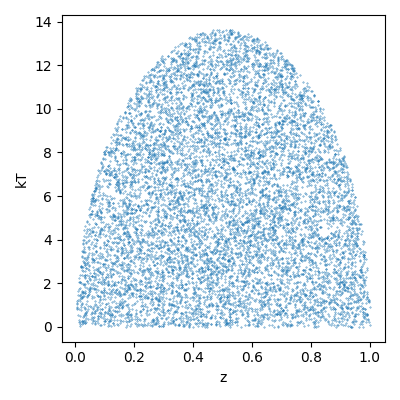

In [5]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(dp.z, dp.kT, s=0.1)
ax.set_xlabel("z")
ax.set_ylabel("kT")
plt.tight_layout()

### Fit

In [2]:
# fit instance (~20 sec)
M = 1.
f = dcs.DCS(M, dirname="dcs/central_")

sort.py line 229 - WARNING: 49370.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 56982.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 63584.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 02424.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 07177.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 93981.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 57650.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 73008.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 65461.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 87729.pkl not clean. It may lead to bad fit. Use sort.clean_data.
sort.py line 229 - WARNING: 36908.pkl not clean. It may lead

/home/jonas/venv/3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [3]:
f.dataset[0]

[Namespace(M=1.0, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=1.0928037769740904, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=1.1942200949688373, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=1.3050482303203024, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=1.426161635227379, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=1.5585148215520244, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=1.7031508834621527, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=1.8612097182041993, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=2.0339370097944314, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=2.2226940464307416, Mmax=None, Mmin=None, NkT=200, Nz=150, d=2, mesh='gaussian', u=0),
 Namespace(M=2.4

In [9]:
# compute differential cross sections
sup = f.sup(dp.z, dp.kT)
inf = f.inf(dp.z, dp.kT)

<IPython.core.display.Javascript object>


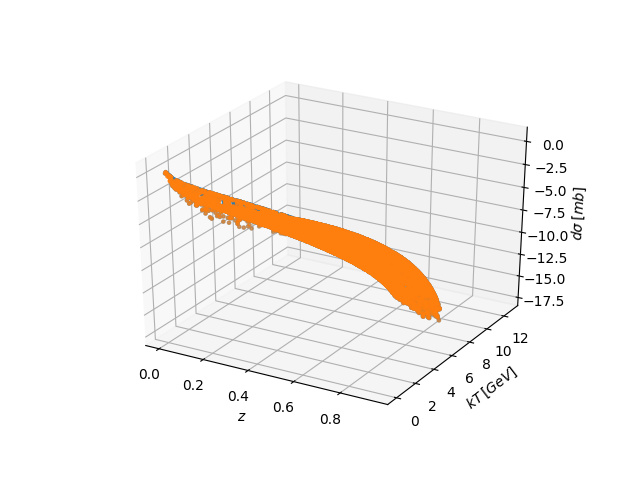

/home/jonas/venv/3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/home/jonas/venv/3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


Text(0.5, 0, '$d\\sigma\\:[mb]$')

In [10]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dp.z, dp.kT, np.log10(sup), marker='.')
ax.scatter(dp.z, dp.kT, np.log10(inf), marker='.')

ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$kT\:[GeV]$")
ax.set_zlabel(r"$d\sigma\:[mb]$")

### Get the integrated cross section

In [9]:
i = ics.ICS()

In [10]:
M = 2.0
cs_npm = i.npm("central", M)
cs_nlo = i.nlo("central", M)
print(cs_npm, cs_nlo)

0.0030550779138379626 0.0043533206038666025


### Get maximal differential cross section

In [13]:
(zsup, kTsup, dcs_sup), (zinf, kTinf, dcs_inf) = f.max_dcs()
print(dcs_sup, dcs_inf)

0.06395269170058693 0.06395269170058693
